In [1]:
import numpy as np
import random

from matplotlib import pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

from Classifiers import *
from utils import *

In [3]:
scale_clf = ScaleClassifier(scales=[4])       #norm2
rp_clf = RandomPointsClassifier(n_points=950) #norm
dct_clf = DCTClassifier(size=5)               #norm2
dft_clf = DFTClassifier(clipped=False)
hist_clf = HistogramClassifier(size=7)
grad_clf = GradientClassifier()

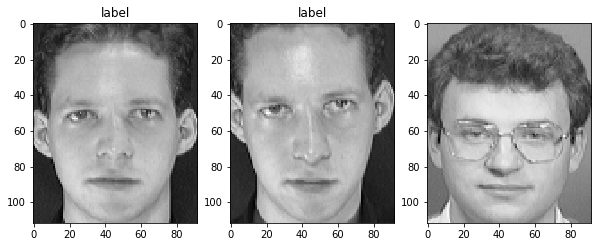

In [14]:
image1 = io.imread("data/att/s1/1.pgm")
image2 = io.imread("data/att/s1/3.pgm")
image3 = io.imread("data/att/s6/4.pgm")

fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,3, 1)
plt.imshow(image1, cmap="gray")
plt.title("label")
fig.add_subplot(1,3, 2)
plt.imshow(image2, cmap="gray")
plt.title("label")
fig.add_subplot(1,3, 3)
plt.imshow(image3, cmap="gray")
plt.show()

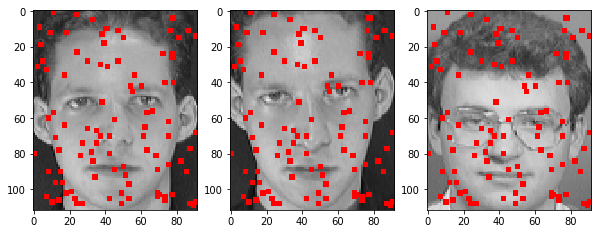

In [19]:
from skimage import draw

rp_clf = RandomPointsClassifier(n_points=100)

image1_rgb = np.stack((image1,)*3, axis=-1)
image2_rgb = np.stack((image2,)*3, axis=-1)
image3_rgb = np.stack((image3,)*3, axis=-1)

for point in rp_clf.points:
    rr,cc = draw.circle(*point, 2)
    draw.set_color(image1_rgb, (rr, cc), (255,0,0))
    draw.set_color(image2_rgb, (rr, cc), (255,0,0))
    draw.set_color(image3_rgb, (rr, cc), (255,0,0))
    
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,3, 1)
plt.imshow(image1_rgb, cmap="gray")
fig.add_subplot(1,3, 2)
plt.imshow(image2_rgb, cmap="gray")
fig.add_subplot(1,3, 3)
plt.imshow(image3_rgb, cmap="gray")
plt.show()

In [17]:
print(rp_clf.Distance(image1,image2), rp_clf.Distance(image1,image3))

1676.9710790589086 1720.782089632502


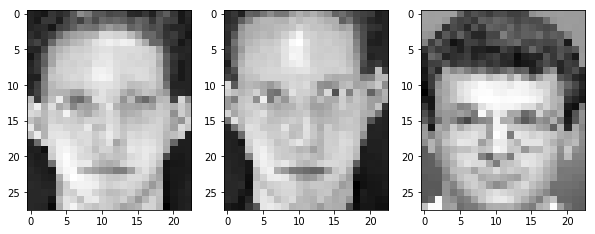

In [20]:
from skimage.transform import rescale

fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,3, 1)
plt.imshow(rescale(image1, 1/4, mode='constant', anti_aliasing=False, multichannel=False), cmap="gray")
fig.add_subplot(1,3, 2)
plt.imshow(rescale(image2, 1/4, mode='constant', anti_aliasing=False, multichannel=False), cmap="gray")
fig.add_subplot(1,3, 3)
plt.imshow(rescale(image3, 1/4, mode='constant', anti_aliasing=False, multichannel=False), cmap="gray")
plt.show()

In [21]:
print(scale_clf.Distance(image1,image2), scale_clf.Distance(image1,image3))

3.5483267658672935 5.656190873207523


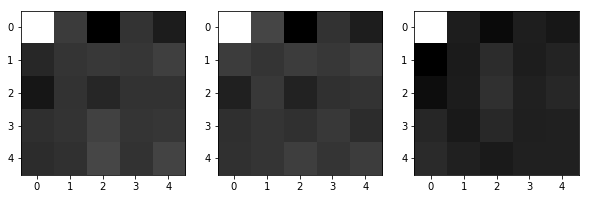

In [22]:
size = 5

img1_dct = dct(dct(image1.T, norm='ortho').T, norm='ortho')
img1_dct = img1_dct[:size, :size]
img2_dct = dct(dct(image2.T, norm='ortho').T, norm='ortho')
img2_dct = img2_dct[:size, :size]
img3_dct = dct(dct(image3.T, norm='ortho').T, norm='ortho')
img3_dct = img3_dct[:size, :size]

fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,3, 1)
plt.imshow(img1_dct, cmap="gray")
fig.add_subplot(1,3, 2)
plt.imshow(img2_dct, cmap="gray")
fig.add_subplot(1,3, 3)
plt.imshow(img3_dct, cmap="gray")
plt.show()

In [23]:
print(dct_clf.Distance(image1,image2), dct_clf.Distance(image1,image3))

2338.5216498087266 4516.347997870332


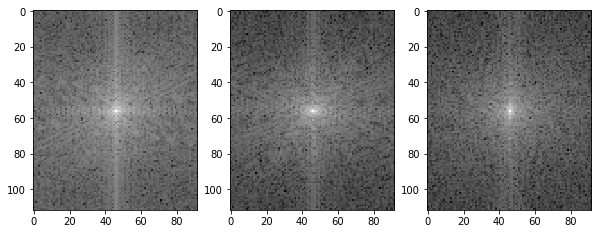

In [24]:
img1_dft = np.fft.fft2(image1)
img1_dft = np.fft.fftshift(img1_dft)
img1_dft = 20*np.log(np.abs(img1_dft))

img2_dft = np.fft.fft2(image2)
img2_dft = np.fft.fftshift(img2_dft)
img2_dft = 20*np.log(np.abs(img2_dft))

img3_dft = np.fft.fft2(image3)
img3_dft = np.fft.fftshift(img3_dft)
img3_dft = 20*np.log(np.abs(img3_dft))

fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,3, 1)
plt.imshow(img1_dft, cmap="gray")
fig.add_subplot(1,3, 2)
plt.imshow(img2_dft, cmap="gray")
fig.add_subplot(1,3, 3)
plt.imshow(img3_dft, cmap="gray")
plt.show()

In [25]:
print(dft_clf.Distance(image1,image2), dft_clf.Distance(image1,image3))

1817.578354835592 1813.2997670730144


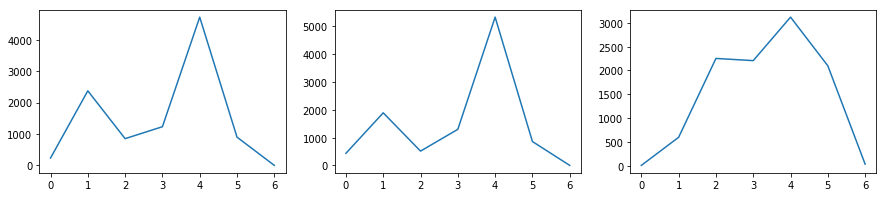

In [34]:
size = 7

img1_hist = cv2.calcHist([image1],[0],None,[size],[0,256])
img2_hist = cv2.calcHist([image2],[0],None,[size],[0,256])
img3_hist = cv2.calcHist([image3],[0],None,[size],[0,256])

fig = plt.figure(figsize=(15,3))
fig.add_subplot(1,3, 1)
plt.plot(img1_hist)
fig.add_subplot(1,3, 2)
plt.plot(img2_hist)
fig.add_subplot(1,3, 3)
plt.plot(img3_hist)

In [35]:
print(hist_clf.Distance(image1,image2), hist_clf.Distance(image1,image3))

872.30383 3174.635


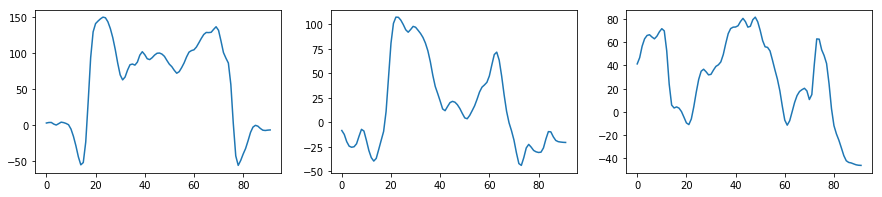

In [36]:
ksize = 5

img1_grad = cv2.Sobel(image1,cv2.CV_64F,0,1,ksize=ksize).mean(axis=0)
img2_grad = cv2.Sobel(image2,cv2.CV_64F,0,1,ksize=ksize).mean(axis=0)
img3_grad = cv2.Sobel(image3,cv2.CV_64F,0,1,ksize=ksize).mean(axis=0)

fig = plt.figure(figsize=(15,3))
fig.add_subplot(1,3, 1)
plt.plot(img1_grad)
fig.add_subplot(1,3, 2)
plt.plot(img2_grad)
fig.add_subplot(1,3, 3)
plt.plot(img3_grad)

In [37]:
print(grad_clf.Distance(image1,image2), grad_clf.Distance(image1,image3))

6.216833095245596e+40 8.736230771805492e+40
